In [1]:
import pandas as pd

In [2]:
sample = pd.read_json("data/rawdata/VibrationBasic4_1_1605042776432_1606172400000.json")

In [3]:
sample

,time,values,gatewayImei,si,sn,pv,added,status,rssi,rawValues,alert
0,1605042869986,"[2.281, 29]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1605042912, '_nanoseconds': 38100...",1,-66.0,"[2281, 290]",NaN
1,1605042870987,"[1.786, 29]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1605042912, '_nanoseconds': 38200...",1,-72.5,"[1786, 290]",NaN
2,1605042871987,"[1.3860000000000001, 29]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1605042912, '_nanoseconds': 38200...",1,-68.0,"[1386, 290]",NaN
3,1605042872979,"[1.548, 29]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1605042912, '_nanoseconds': 38200...",1,-57.0,"[1548, 290]",NaN
4,1605042873975,"[0.866, 29]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1605042912, '_nanoseconds': 38200...",1,-58.5,"[866, 290]",NaN
...,...,...,...,...,...,...,...,...,...,...,...
40520,1606171905559,"[0.03, 24]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1606172022, '_nanoseconds': 50400...",1,-69.5,"[30, 240]",NaN
40521,1606172025871,"[0.032, 24]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1606172142, '_nanoseconds': 34900...",1,-67.0,"[32, 240]",NaN
40522,1606172146192,"[0.038, 24]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1606172262, '_nanoseconds': 50400...",1,-69.5,"[38, 240]",NaN
40523,1606172266521,"[0.03, 25]",359377060473922,"[g, °C]",20008813,0,"{'_seconds': 1606172382, '_nanoseconds': 42900...",1,-62.5,"[30, 250]",NaN


In [4]:
s2 = sample[["time", "values"]]

In [5]:
s2

,time,values
0,1605042869986,"[2.281, 29]"
1,1605042870987,"[1.786, 29]"
2,1605042871987,"[1.3860000000000001, 29]"
3,1605042872979,"[1.548, 29]"
4,1605042873975,"[0.866, 29]"
...,...,...
40520,1606171905559,"[0.03, 24]"
40521,1606172025871,"[0.032, 24]"
40522,1606172146192,"[0.038, 24]"
40523,1606172266521,"[0.03, 25]"


In [6]:
s2["values"].str.extract('(P?<g>.*)')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
40520,NaN
40521,NaN
40522,NaN
40523,NaN


In [7]:
#s2.values.str.split(',')

In [8]:
s2["values"].str.split(',')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
40520   NaN
40521   NaN
40522   NaN
40523   NaN
40524   NaN
Name: values, Length: 40525, dtype: float64

In [9]:
s2["g_list"] = s2["values"].str.slice(stop=1)

<ipython-input-9-22e4fdbd5ff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["g_list"] = s2["values"].str.slice(stop=1)


In [10]:
s2 = sample[["time", "rawValues", "values"]]

In [11]:
s2

,time,rawValues,values
0,1605042869986,"[2281, 290]","[2.281, 29]"
1,1605042870987,"[1786, 290]","[1.786, 29]"
2,1605042871987,"[1386, 290]","[1.3860000000000001, 29]"
3,1605042872979,"[1548, 290]","[1.548, 29]"
4,1605042873975,"[866, 290]","[0.866, 29]"
...,...,...,...
40520,1606171905559,"[30, 240]","[0.03, 24]"
40521,1606172025871,"[32, 240]","[0.032, 24]"
40522,1606172146192,"[38, 240]","[0.038, 24]"
40523,1606172266521,"[30, 250]","[0.03, 25]"


In [12]:
s2.rawValues.values[0:3]

array([list([2281, 290]), list([1786, 290]), list([1386, 290])],
      dtype=object)

In [13]:
s2['g'] = [','.join(map(str, l)) for l in s2['rawValues']]

<ipython-input-13-d3f8ff3ab7cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g'] = [','.join(map(str, l)) for l in s2['rawValues']]


In [14]:
s2['g_C'] = s2['values'].apply(lambda x: ','.join(map(str, x)))

<ipython-input-14-767967c45c57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g_C'] = s2['values'].apply(lambda x: ','.join(map(str, x)))


In [15]:
s2['g'] = s2['values'].apply(lambda x:[float(i) for i in x])

<ipython-input-15-238facb47a68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g'] = s2['values'].apply(lambda x:[float(i) for i in x])


In [16]:
s2.loc[::2].values

array([[1605042869986, list([2281, 290]), list([2.281, 29]),
        list([2.281, 29.0]), '2.281,29'],
       [1605042871987, list([1386, 290]), list([1.3860000000000001, 29]),
        list([1.3860000000000001, 29.0]), '1.3860000000000001,29'],
       [1605042873975, list([866, 290]), list([0.866, 29]),
        list([0.866, 29.0]), '0.866,29'],
       ...,
       [1606171905559, list([30, 240]), list([0.03, 24]),
        list([0.03, 24.0]), '0.03,24'],
       [1606172146192, list([38, 240]), list([0.038, 24]),
        list([0.038, 24.0]), '0.038,24'],
       [1606172386839, list([41, 250]), list([0.041, 25]),
        list([0.041, 25.0]), '0.041,25']], dtype=object)

In [17]:
s2[['g','C']] = s2['g_C'].str.split(',',expand=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
s2['C'] = s2['g_C'].str.slice(start=2)

<ipython-input-18-361b234a6273>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['C'] = s2['g_C'].str.slice(start=2)


In [19]:
s2.head()

,time,rawValues,values,g,g_C,C
0,1605042869986,"[2281, 290]","[2.281, 29]",2.281,"2.281,29","281,29"
1,1605042870987,"[1786, 290]","[1.786, 29]",1.786,"1.786,29","786,29"
2,1605042871987,"[1386, 290]","[1.3860000000000001, 29]",1.3860000000000001,"1.3860000000000001,29","3860000000000001,29"
3,1605042872979,"[1548, 290]","[1.548, 29]",1.548,"1.548,29","548,29"
4,1605042873975,"[866, 290]","[0.866, 29]",0.866,"0.866,29","866,29"


In [20]:
s2

,time,rawValues,values,g,g_C,C
0,1605042869986,"[2281, 290]","[2.281, 29]",2.281,"2.281,29","281,29"
1,1605042870987,"[1786, 290]","[1.786, 29]",1.786,"1.786,29","786,29"
2,1605042871987,"[1386, 290]","[1.3860000000000001, 29]",1.3860000000000001,"1.3860000000000001,29","3860000000000001,29"
3,1605042872979,"[1548, 290]","[1.548, 29]",1.548,"1.548,29","548,29"
4,1605042873975,"[866, 290]","[0.866, 29]",0.866,"0.866,29","866,29"
...,...,...,...,...,...,...
40520,1606171905559,"[30, 240]","[0.03, 24]",0.03,"0.03,24","03,24"
40521,1606172025871,"[32, 240]","[0.032, 24]",0.032,"0.032,24","032,24"
40522,1606172146192,"[38, 240]","[0.038, 24]",0.038,"0.038,24","038,24"
40523,1606172266521,"[30, 250]","[0.03, 25]",0.03,"0.03,25","03,25"


In [21]:
#s2.plot("time","g")

In [22]:
s3 = s2[["g"]]

In [23]:
s3

,g
0,2.281
1,1.786
2,1.3860000000000001
3,1.548
4,0.866
...,...
40520,0.03
40521,0.032
40522,0.038
40523,0.03


In [24]:
#s3.plot()

In [25]:
s3.dtypes

g    object
dtype: object

In [26]:
s3['g'] = s3['g'].astype(float)

<ipython-input-26-d62726677f80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3['g'] = s3['g'].astype(float)


In [27]:
s3

,g
0,2.281
1,1.786
2,1.386
3,1.548
4,0.866
...,...
40520,0.030
40521,0.032
40522,0.038
40523,0.030


In [28]:
s3.dtypes

g    float64
dtype: object

<AxesSubplot:>

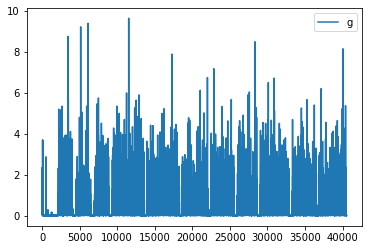

In [29]:
s3.plot()

In [30]:
g = sample[["time", "values"]]

In [31]:
g

,time,values
0,1605042869986,"[2.281, 29]"
1,1605042870987,"[1.786, 29]"
2,1605042871987,"[1.3860000000000001, 29]"
3,1605042872979,"[1.548, 29]"
4,1605042873975,"[0.866, 29]"
...,...,...
40520,1606171905559,"[0.03, 24]"
40521,1606172025871,"[0.032, 24]"
40522,1606172146192,"[0.038, 24]"
40523,1606172266521,"[0.03, 25]"


In [32]:
g['g_C'] = [','.join(map(str, l)) for l in g['values']]

<ipython-input-32-e72591bb7307>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['g_C'] = [','.join(map(str, l)) for l in g['values']]


In [33]:
g

,time,values,g_C
0,1605042869986,"[2.281, 29]","2.281,29"
1,1605042870987,"[1.786, 29]","1.786,29"
2,1605042871987,"[1.3860000000000001, 29]","1.3860000000000001,29"
3,1605042872979,"[1.548, 29]","1.548,29"
4,1605042873975,"[0.866, 29]","0.866,29"
...,...,...,...
40520,1606171905559,"[0.03, 24]","0.03,24"
40521,1606172025871,"[0.032, 24]","0.032,24"
40522,1606172146192,"[0.038, 24]","0.038,24"
40523,1606172266521,"[0.03, 25]","0.03,25"


In [34]:
g['g'] = g['g_C'].str.slice(stop=-3)

<ipython-input-34-d61026fd986c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['g'] = g['g_C'].str.slice(stop=-3)


In [35]:
s2.dtypes

time          int64
rawValues    object
values       object
g            object
g_C          object
C            object
dtype: object

In [36]:
s2['g'] = s2['g'].astype(float)

<ipython-input-36-8ee4d752cfa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g'] = s2['g'].astype(float)


In [37]:
s2["g"]

0        2.281
1        1.786
2        1.386
3        1.548
4        0.866
         ...  
40520    0.030
40521    0.032
40522    0.038
40523    0.030
40524    0.041
Name: g, Length: 40525, dtype: float64

<AxesSubplot:>

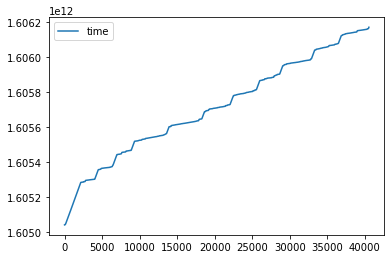

In [38]:
g.plot()

In [39]:
g2 = s2[s2["g"] > 0.1]

In [40]:
g2

,time,rawValues,values,g,g_C,C
0,1605042869986,"[2281, 290]","[2.281, 29]",2.281,"2.281,29","281,29"
1,1605042870987,"[1786, 290]","[1.786, 29]",1.786,"1.786,29","786,29"
2,1605042871987,"[1386, 290]","[1.3860000000000001, 29]",1.386,"1.3860000000000001,29","3860000000000001,29"
3,1605042872979,"[1548, 290]","[1.548, 29]",1.548,"1.548,29","548,29"
4,1605042873975,"[866, 290]","[0.866, 29]",0.866,"0.866,29","866,29"
...,...,...,...,...,...,...
40454,1606164487976,"[101, 240]","[0.101, 24]",0.101,"0.101,24","101,24"
40455,1606164544147,"[261, 240]","[0.261, 24]",0.261,"0.261,24","261,24"
40456,1606164549160,"[115, 240]","[0.115, 24]",0.115,"0.115,24","115,24"
40457,1606164562200,"[412, 240]","[0.41200000000000003, 24]",0.412,"0.41200000000000003,24","41200000000000003,24"


In [41]:
g3 = g2[["g"]]

<AxesSubplot:>

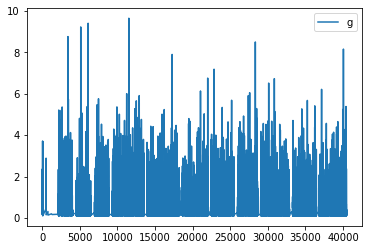

In [42]:
g3.plot()

In [43]:
sample = pd.read_json("data/rawdata/VibrationBasic4_1_1605042776432_1606172400000.json")

<ipython-input-44-767967c45c57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g_C'] = s2['values'].apply(lambda x: ','.join(map(str, x)))
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-44-8ee4d752cfa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

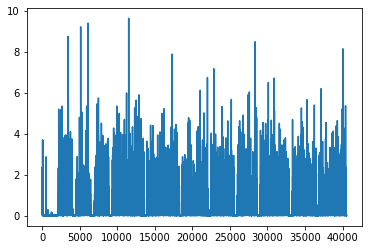

<ipython-input-44-5b6b54f0c412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["g2"] = s2["g"].copy
<ipython-input-44-9fbbb6f0a7dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["g2"] = s2[s2["g"] > 0.1]
<ipython-input-44-bad483c66c04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

l 136

0.111
2020-11-13 18:53:28.034000+01:00
4
l 137

0.258
2020-11-13 18:54:12.867000+01:00
4
k 0
l 137


In [44]:
%run PrepareData.ipynb

In [45]:
s2

,time,values,g_C,g,C,g2
0,1605042869986,"[2.281, 29]","2.281,29",2.281,29,1.60504e+12
1,1605042870987,"[1.786, 29]","1.786,29",1.786,29,1.60504e+12
2,1605042871987,"[1.3860000000000001, 29]","1.3860000000000001,29",1.386,29,1.60504e+12
3,1605042872979,"[1.548, 29]","1.548,29",1.548,29,1.60504e+12
4,1605042873975,"[0.866, 29]","0.866,29",0.866,29,1.60504e+12
...,...,...,...,...,...,...
40520,1606171905559,"[0.03, 24]","0.03,24",0.030,24,NaN
40521,1606172025871,"[0.032, 24]","0.032,24",0.032,24,NaN
40522,1606172146192,"[0.038, 24]","0.038,24",0.038,24,NaN
40523,1606172266521,"[0.03, 25]","0.03,25",0.030,25,NaN


In [46]:
s2.iloc[:, 0::3]

,time,g
0,1605042869986,2.281
1,1605042870987,1.786
2,1605042871987,1.386
3,1605042872979,1.548
4,1605042873975,0.866
...,...,...
40520,1606171905559,0.030
40521,1606172025871,0.032
40522,1606172146192,0.038
40523,1606172266521,0.030


<AxesSubplot:>

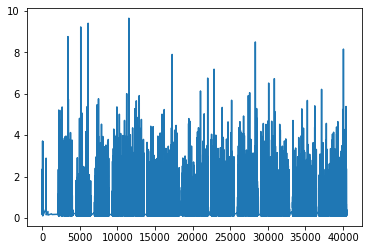

In [47]:
s2[s2["g"] > 0.1].iloc[:, 3].plot()

In [48]:
s2["g2"] = s2[s2["g"] > 0.1].iloc[:, 3].copy()

<ipython-input-48-75389473fc85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["g2"] = s2[s2["g"] > 0.1].iloc[:, 3].copy()


<AxesSubplot:>

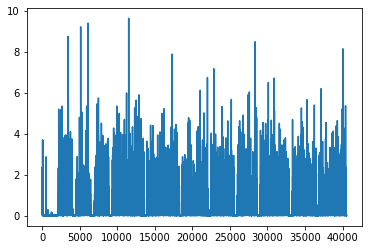

In [49]:
s2["g"].plot()

<AxesSubplot:>

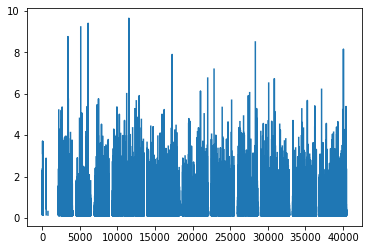

In [50]:
s2["g2"].plot()

In [51]:
s2["g2"][40100:40200]

40100    0.220
40101    0.116
40102    0.276
40103      NaN
40104    0.480
         ...  
40195    0.178
40196      NaN
40197    0.221
40198      NaN
40199    0.691
Name: g2, Length: 100, dtype: float64

In [52]:
s2

,time,values,g_C,g,C,g2
0,1605042869986,"[2.281, 29]","2.281,29",2.281,29,2.281
1,1605042870987,"[1.786, 29]","1.786,29",1.786,29,1.786
2,1605042871987,"[1.3860000000000001, 29]","1.3860000000000001,29",1.386,29,1.386
3,1605042872979,"[1.548, 29]","1.548,29",1.548,29,1.548
4,1605042873975,"[0.866, 29]","0.866,29",0.866,29,0.866
...,...,...,...,...,...,...
40520,1606171905559,"[0.03, 24]","0.03,24",0.030,24,NaN
40521,1606172025871,"[0.032, 24]","0.032,24",0.032,24,NaN
40522,1606172146192,"[0.038, 24]","0.038,24",0.038,24,NaN
40523,1606172266521,"[0.03, 25]","0.03,25",0.030,25,NaN


In [53]:
s3 = s2[["time", "g"]]

In [54]:
s3

,time,g
0,1605042869986,2.281
1,1605042870987,1.786
2,1605042871987,1.386
3,1605042872979,1.548
4,1605042873975,0.866
...,...,...
40520,1606171905559,0.030
40521,1606172025871,0.032
40522,1606172146192,0.038
40523,1606172266521,0.030


In [55]:
s3["datetime"] = pd.to_datetime(s3["time"], unit="ms")

<ipython-input-55-989b03078e2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3["datetime"] = pd.to_datetime(s3["time"], unit="ms")


In [56]:
s3

,time,g,datetime
0,1605042869986,2.281,2020-11-10 21:14:29.986
1,1605042870987,1.786,2020-11-10 21:14:30.987
2,1605042871987,1.386,2020-11-10 21:14:31.987
3,1605042872979,1.548,2020-11-10 21:14:32.979
4,1605042873975,0.866,2020-11-10 21:14:33.975
...,...,...,...
40520,1606171905559,0.030,2020-11-23 22:51:45.559
40521,1606172025871,0.032,2020-11-23 22:53:45.871
40522,1606172146192,0.038,2020-11-23 22:55:46.192
40523,1606172266521,0.030,2020-11-23 22:57:46.521


In [57]:
s3["datetime"] = pd.to_datetime(s3["time"], unit="ms").dt.tz_localize('UTC').dt.tz_convert('Europe/Oslo')

<ipython-input-57-bad483c66c04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3["datetime"] = pd.to_datetime(s3["time"], unit="ms").dt.tz_localize('UTC').dt.tz_convert('Europe/Oslo')


In [58]:
s3

,time,g,datetime
0,1605042869986,2.281,2020-11-10 22:14:29.986000+01:00
1,1605042870987,1.786,2020-11-10 22:14:30.987000+01:00
2,1605042871987,1.386,2020-11-10 22:14:31.987000+01:00
3,1605042872979,1.548,2020-11-10 22:14:32.979000+01:00
4,1605042873975,0.866,2020-11-10 22:14:33.975000+01:00
...,...,...,...
40520,1606171905559,0.030,2020-11-23 23:51:45.559000+01:00
40521,1606172025871,0.032,2020-11-23 23:53:45.871000+01:00
40522,1606172146192,0.038,2020-11-23 23:55:46.192000+01:00
40523,1606172266521,0.030,2020-11-23 23:57:46.521000+01:00


In [59]:
s3["weekday"] = s3["datetime"].dt.strftime("%A")

<ipython-input-59-ac77ac60a62e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3["weekday"] = s3["datetime"].dt.strftime("%A")


In [60]:
s3.dtypes

time                              int64
g                               float64
datetime    datetime64[ns, Europe/Oslo]
weekday                          object
dtype: object

In [61]:
s3['weekday'] = s3['datetime'].dt.dayofweek

<ipython-input-61-8651bd14b6ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s3['weekday'] = s3['datetime'].dt.dayofweek


In [62]:
s3

,time,g,datetime,weekday
0,1605042869986,2.281,2020-11-10 22:14:29.986000+01:00,1
1,1605042870987,1.786,2020-11-10 22:14:30.987000+01:00,1
2,1605042871987,1.386,2020-11-10 22:14:31.987000+01:00,1
3,1605042872979,1.548,2020-11-10 22:14:32.979000+01:00,1
4,1605042873975,0.866,2020-11-10 22:14:33.975000+01:00,1
...,...,...,...,...
40520,1606171905559,0.030,2020-11-23 23:51:45.559000+01:00,0
40521,1606172025871,0.032,2020-11-23 23:53:45.871000+01:00,0
40522,1606172146192,0.038,2020-11-23 23:55:46.192000+01:00,0
40523,1606172266521,0.030,2020-11-23 23:57:46.521000+01:00,0


In [63]:
s4 = s3[s3["weekday"] == 4].iloc[:, 1]

In [64]:
s5 = s4.reset_index()

<AxesSubplot:>

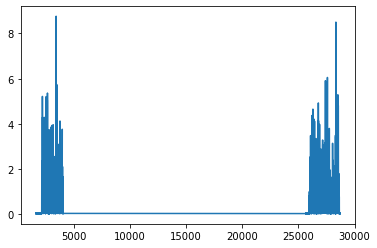

In [65]:
s4.plot()

In [66]:
s5

,index,g
0,1615,0.047
1,1616,0.027
2,1617,0.048
3,1618,0.036
4,1619,0.031
...,...,...
5516,28710,0.036
5517,28711,0.036
5518,28712,0.038
5519,28713,0.028


<AxesSubplot:>

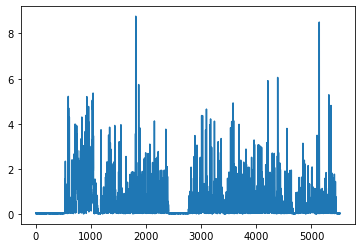

In [67]:
s5["g"].plot()

In [68]:
s6 = s3.to_numpy()

In [69]:
s6

array([[1605042869986, 2.281,
        Timestamp('2020-11-10 22:14:29.986000+0100', tz='Europe/Oslo'),
        1],
       [1605042870987, 1.786,
        Timestamp('2020-11-10 22:14:30.987000+0100', tz='Europe/Oslo'),
        1],
       [1605042871987, 1.3860000000000001,
        Timestamp('2020-11-10 22:14:31.987000+0100', tz='Europe/Oslo'),
        1],
       ...,
       [1606172146192, 0.038,
        Timestamp('2020-11-23 23:55:46.192000+0100', tz='Europe/Oslo'),
        0],
       [1606172266521, 0.03,
        Timestamp('2020-11-23 23:57:46.521000+0100', tz='Europe/Oslo'),
        0],
       [1606172386839, 0.041,
        Timestamp('2020-11-23 23:59:46.839000+0100', tz='Europe/Oslo'),
        0]], dtype=object)

In [70]:
i = 0

k = 0

l = 0

for index, row in s3.iterrows():
    if (i < 10):
        #print(row["datetime"])
        #print(row["weekday"])
        #print(row["g"])
        i += 1
    if (row["g"] > 0.1):
        k += 1
        if (k > l):
            l = k
            if (l > 135):
                print("l", l)
                print()
                print(row["g"])
                print(row["datetime"])
                print(row["weekday"])
    else:
        k = 0

print("k", k)
print("l", l)


l 136

0.111
2020-11-13 18:53:28.034000+01:00
4
l 137

0.258
2020-11-13 18:54:12.867000+01:00
4
k 0
l 137


In [71]:
s3.cumsum()

,time,g,datetime,weekday
0,1605042869986,2.281,2020-11-10 22:14:29.986000+01:00,1
1,3210085740973,4.067,2071-09-21 19:29:00.973000+01:00,2
2,4815128612960,5.453,2122-08-02 16:43:32.960000+01:00,3
3,6420171485939,7.001,2173-06-12 13:58:05.939000+01:00,4
4,8025214359914,7.867,2224-04-23 11:12:39.914000+01:00,5
...,...,...,...,...
40520,65065195496818635,13800.200,2081-10-31 16:07:25.046450368+01:00,118323
40521,65066801668844506,13800.232,2132-09-24 15:01:10.917450368+01:00,118323
40522,65068407840990698,13800.270,2183-08-18 13:56:57.109450368+01:00,118323
40523,65070014013257219,13800.300,2234-07-12 12:54:43.630450368+01:00,118323


In [72]:
s3

,time,g,datetime,weekday
0,1605042869986,2.281,2020-11-10 22:14:29.986000+01:00,1
1,1605042870987,1.786,2020-11-10 22:14:30.987000+01:00,1
2,1605042871987,1.386,2020-11-10 22:14:31.987000+01:00,1
3,1605042872979,1.548,2020-11-10 22:14:32.979000+01:00,1
4,1605042873975,0.866,2020-11-10 22:14:33.975000+01:00,1
...,...,...,...,...
40520,1606171905559,0.030,2020-11-23 23:51:45.559000+01:00,0
40521,1606172025871,0.032,2020-11-23 23:53:45.871000+01:00,0
40522,1606172146192,0.038,2020-11-23 23:55:46.192000+01:00,0
40523,1606172266521,0.030,2020-11-23 23:57:46.521000+01:00,0


In [73]:
import matplotlib.pyplot as plt

In [74]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [75]:
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

<AxesSubplot:>

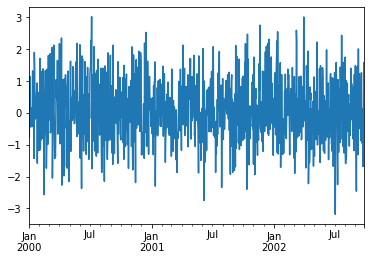

In [76]:
ts.plot()

In [77]:
#s3.index(s3["datetime"])

In [78]:
ts

2000-01-01    0.088672
2000-01-02   -0.755332
2000-01-03    0.424240
2000-01-04    1.141391
2000-01-05   -0.439484
                ...   
2002-09-22   -0.283888
2002-09-23    0.127967
2002-09-24   -1.682347
2002-09-25   -1.368303
2002-09-26    1.574127
Freq: D, Length: 1000, dtype: float64

In [79]:
s3 = s3.set_index('datetime')

In [80]:
ts.resample("5Min").sum()

2000-01-01 00:00:00    0.088672
2000-01-01 00:05:00    0.000000
2000-01-01 00:10:00    0.000000
2000-01-01 00:15:00    0.000000
2000-01-01 00:20:00    0.000000
                         ...   
2002-09-25 23:40:00    0.000000
2002-09-25 23:45:00    0.000000
2002-09-25 23:50:00    0.000000
2002-09-25 23:55:00    0.000000
2002-09-26 00:00:00    1.574127
Freq: 5T, Length: 287713, dtype: float64

In [81]:
s3.resample("5Min").sum()

,time,g,weekday
datetime,,,
2020-11-10 22:10:00+01:00,40126072124895,28.354,25
2020-11-10 22:15:00+01:00,35310944647935,10.342,22
2020-11-10 22:20:00+01:00,3210086723871,0.057,2
2020-11-10 22:25:00+01:00,24075652987605,16.626,15
2020-11-10 22:30:00+01:00,3210087864875,0.078,2
...,...,...,...
2020-11-23 23:35:00+01:00,4818513190144,0.106,0
2020-11-23 23:40:00+01:00,3212342728338,0.061,0
2020-11-23 23:45:00+01:00,4818514994837,0.109,0


<ipython-input-2-767967c45c57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['g_C'] = s2['values'].apply(lambda x: ','.join(map(str, x)))
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-2-8ee4d752cfa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

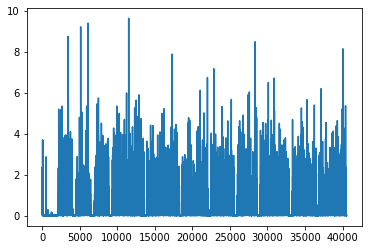

<ipython-input-2-5b6b54f0c412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["g2"] = s2["g"].copy
<ipython-input-2-9fbbb6f0a7dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["g2"] = s2[s2["g"] > 0.1]
<ipython-input-2-bad483c66c04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

l 136

0.111
2020-11-13 18:53:28.034000+01:00
4
l 137

0.258
2020-11-13 18:54:12.867000+01:00
4
k 0
l 137


In [2]:
%run PrepareData.ipynb

In [83]:
s3.resample("1Min").sum()

,g,year,month,day,week,weekday,hour,minutes,ones
datetime,,,,,,,,,
2020-11-10 22:14:00+01:00,28.354,50500,275,250,1150,25,550,350,25
2020-11-10 22:15:00+01:00,10.260,40400,220,200,920,20,440,300,20
2020-11-10 22:16:00+01:00,0.000,0,0,0,0,0,0,0,0
2020-11-10 22:17:00+01:00,0.045,2020,11,10,46,1,22,17,1
2020-11-10 22:18:00+01:00,0.000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-11-23 23:55:00+01:00,0.038,2020,11,23,48,0,23,55,1
2020-11-23 23:56:00+01:00,0.000,0,0,0,0,0,0,0,0
2020-11-23 23:57:00+01:00,0.030,2020,11,23,48,0,23,57,1


In [84]:
s3

,g,year,month,day,week,weekday,Weekday,hour,minutes,ones
datetime,,,,,,,,,,
2020-11-10 22:14:29.986000+01:00,2.281,2020,11,10,46,1,Tuesday,22,14,1
2020-11-10 22:14:30.987000+01:00,1.786,2020,11,10,46,1,Tuesday,22,14,1
2020-11-10 22:14:31.987000+01:00,1.386,2020,11,10,46,1,Tuesday,22,14,1
2020-11-10 22:14:32.979000+01:00,1.548,2020,11,10,46,1,Tuesday,22,14,1
2020-11-10 22:14:33.975000+01:00,0.866,2020,11,10,46,1,Tuesday,22,14,1
...,...,...,...,...,...,...,...,...,...,...
2020-11-23 23:51:45.559000+01:00,0.030,2020,11,23,48,0,Monday,23,51,1
2020-11-23 23:53:45.871000+01:00,0.032,2020,11,23,48,0,Monday,23,53,1
2020-11-23 23:55:46.192000+01:00,0.038,2020,11,23,48,0,Monday,23,55,1


In [85]:
#s3 = s3.set_index('datetime')

In [86]:
s3[18000:18200]

,g,year,month,day,week,weekday,Weekday,hour,minutes,ones
datetime,,,,,,,,,,
2020-11-17 21:59:47.168000+01:00,0.203,2020,11,17,47,1,Tuesday,21,59,1
2020-11-17 21:59:49.166000+01:00,0.075,2020,11,17,47,1,Tuesday,21,59,1
2020-11-17 22:00:03.177000+01:00,0.516,2020,11,17,47,1,Tuesday,22,0,1
2020-11-17 22:00:04.175000+01:00,0.221,2020,11,17,47,1,Tuesday,22,0,1
2020-11-17 22:00:05.177000+01:00,0.110,2020,11,17,47,1,Tuesday,22,0,1
...,...,...,...,...,...,...,...,...,...,...
2020-11-17 22:21:36.252000+01:00,0.267,2020,11,17,47,1,Tuesday,22,21,1
2020-11-17 22:21:37.252000+01:00,0.130,2020,11,17,47,1,Tuesday,22,21,1
2020-11-17 22:21:50.261000+01:00,0.415,2020,11,17,47,1,Tuesday,22,21,1


In [87]:
s3.resample("2Min").sum()[9000:9200]

,g,year,month,day,week,weekday,hour,minutes,ones
datetime,,,,,,,,,
2020-11-23 10:14:00+01:00,0.042,2020,11,23,48,0,10,15,1
2020-11-23 10:16:00+01:00,0.045,2020,11,23,48,0,10,17,1
2020-11-23 10:18:00+01:00,0.045,2020,11,23,48,0,10,19,1
2020-11-23 10:20:00+01:00,0.031,2020,11,23,48,0,10,21,1
2020-11-23 10:22:00+01:00,0.031,2020,11,23,48,0,10,23,1
...,...,...,...,...,...,...,...,...,...
2020-11-23 16:44:00+01:00,0.042,2020,11,23,48,0,16,44,1
2020-11-23 16:46:00+01:00,0.045,2020,11,23,48,0,16,46,1
2020-11-23 16:48:00+01:00,0.031,2020,11,23,48,0,16,48,1


<AxesSubplot:xlabel='datetime'>

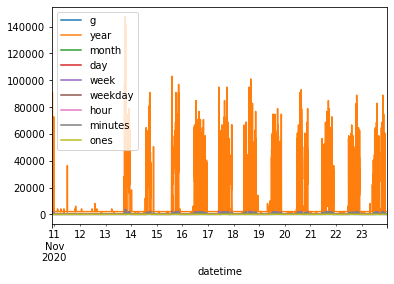

In [88]:
s3.resample("2Min").sum().plot()

<AxesSubplot:xlabel='datetime'>

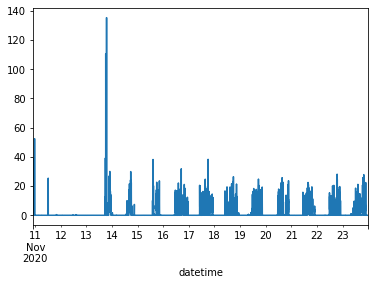

In [89]:
s3.resample("2Min").sum()["g"].plot()

In [90]:
s3.resample("2Min").sum()[9150:9200]

,g,year,month,day,week,weekday,hour,minutes,ones
datetime,,,,,,,,,
2020-11-23 15:14:00+01:00,4.742,30300,165,345,720,0,225,221,15
2020-11-23 15:16:00+01:00,12.385,52520,286,598,1248,0,390,432,26
2020-11-23 15:18:00+01:00,13.730,54540,297,621,1296,0,405,495,27
2020-11-23 15:20:00+01:00,0.919,10100,55,115,240,0,75,105,5
2020-11-23 15:22:00+01:00,6.015,34340,187,391,816,0,255,383,17
2020-11-23 15:24:00+01:00,6.874,50500,275,575,1200,0,375,611,25
2020-11-23 15:26:00+01:00,9.966,40400,220,460,960,0,300,525,20
2020-11-23 15:28:00+01:00,5.796,36360,198,414,864,0,270,511,18
2020-11-23 15:30:00+01:00,4.775,44440,242,506,1056,0,330,668,22


<AxesSubplot:xlabel='datetime'>

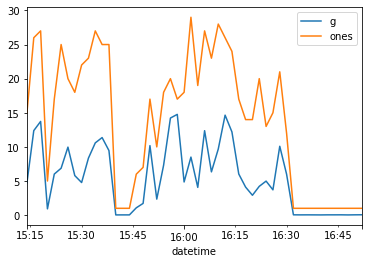

In [91]:
s3.resample("2Min").sum()[["g","ones"]][9150:9200].plot()

In [92]:
s3.resample("2Min").sum()[["g","ones"]][9160:9195]

,g,ones
datetime,,
2020-11-23 15:34:00+01:00,10.588,27
2020-11-23 15:36:00+01:00,11.366,25
2020-11-23 15:38:00+01:00,9.462,25
2020-11-23 15:40:00+01:00,0.032,1
2020-11-23 15:42:00+01:00,0.035,1
2020-11-23 15:44:00+01:00,0.035,1
2020-11-23 15:46:00+01:00,1.071,6
2020-11-23 15:48:00+01:00,1.719,7
2020-11-23 15:50:00+01:00,10.185,17


<AxesSubplot:xlabel='datetime'>

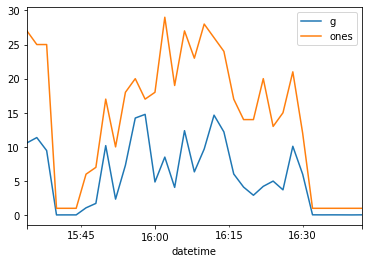

In [93]:
s3.resample("2Min").sum()[["g","ones"]][9160:9195].plot()

In [94]:
s3.resample("2Min").sum()[9150:9200]

,g,year,month,day,week,weekday,hour,minutes,ones
datetime,,,,,,,,,
2020-11-23 15:14:00+01:00,4.742,30300,165,345,720,0,225,221,15
2020-11-23 15:16:00+01:00,12.385,52520,286,598,1248,0,390,432,26
2020-11-23 15:18:00+01:00,13.730,54540,297,621,1296,0,405,495,27
2020-11-23 15:20:00+01:00,0.919,10100,55,115,240,0,75,105,5
2020-11-23 15:22:00+01:00,6.015,34340,187,391,816,0,255,383,17
2020-11-23 15:24:00+01:00,6.874,50500,275,575,1200,0,375,611,25
2020-11-23 15:26:00+01:00,9.966,40400,220,460,960,0,300,525,20
2020-11-23 15:28:00+01:00,5.796,36360,198,414,864,0,270,511,18
2020-11-23 15:30:00+01:00,4.775,44440,242,506,1056,0,330,668,22


<AxesSubplot:xlabel='datetime'>

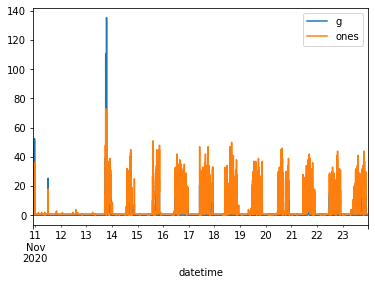

In [95]:
s3.resample("2Min").sum()[["g","ones"]].plot()

<AxesSubplot:xlabel='datetime'>

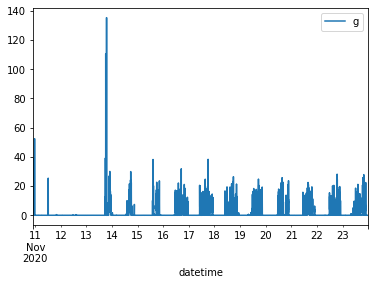

In [96]:
s3.resample("2Min").sum()[["g"]].plot()

<AxesSubplot:xlabel='datetime'>

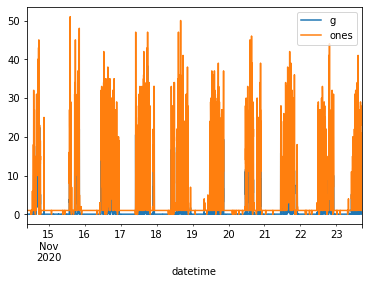

In [97]:
s3.resample("2Min").sum()[["g","ones"]][2500:9200].plot()

<AxesSubplot:xlabel='datetime'>

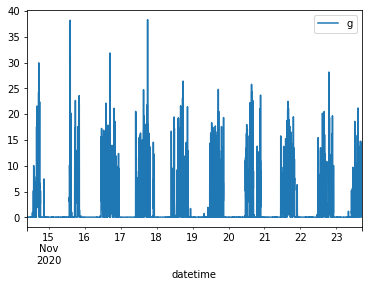

In [98]:
s3.resample("2Min").sum()[["g"]][2500:9200].plot()

In [99]:
s3.resample("2Min").sum()[["g","ones"]][2500:9200]

,g,ones
datetime,,
2020-11-14 09:34:00+01:00,0.045,1
2020-11-14 09:36:00+01:00,0.026,1
2020-11-14 09:38:00+01:00,0.026,1
2020-11-14 09:40:00+01:00,0.043,1
2020-11-14 09:42:00+01:00,0.041,1
...,...,...
2020-11-23 16:44:00+01:00,0.042,1
2020-11-23 16:46:00+01:00,0.045,1
2020-11-23 16:48:00+01:00,0.031,1


<AxesSubplot:xlabel='datetime'>

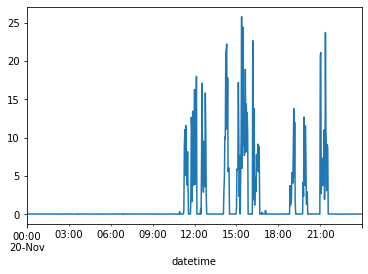

In [100]:
s3[s3["day"] == 20].resample("2Min").sum()["g"].plot()

<AxesSubplot:xlabel='datetime'>

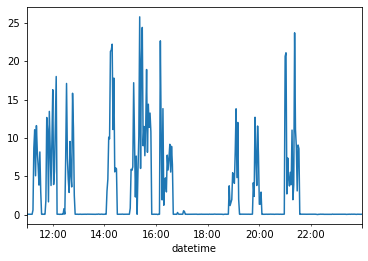

In [101]:
s3[(s3["day"] == 20) & (s3["hour"] > 10)].resample("2Min").sum()["g"].plot()

In [102]:
i = 0

k = 0

l = 0

m = 100

for index, row in s3.iterrows():
    if (i < 10):
        #print(row["datetime"])
        #print(row["weekday"])
        #print(row["g"])
        i += 1
    if (row["g"] > 0.1):
        k += 1
        if (k > l):
            l = k
            if (l > 135):
                print("l", l)
                print()
                print(row["g"])
                print(index)
                print(row["weekday"])
                m = 0
    else:
        k = 0
    if (m < 10):
        print(row["g"])
        print(index)
        print(row["weekday"])
        m += 1
    else:
        m = 100

print("k", k)
print("l", l)


l 136

0.111
2020-11-13 18:53:28.034000+01:00
4
0.111
2020-11-13 18:53:28.034000+01:00
4
l 137

0.258
2020-11-13 18:54:12.867000+01:00
4
0.258
2020-11-13 18:54:12.867000+01:00
4
0.075
2020-11-13 18:54:13.871000+01:00
4
0.2
2020-11-13 18:54:20.850000+01:00
4
0.077
2020-11-13 18:54:22.845000+01:00
4
0.291
2020-11-13 18:56:01.517000+01:00
4
0.157
2020-11-13 18:56:02.515000+01:00
4
0.056
2020-11-13 18:56:04.511000+01:00
4
0.031
2020-11-13 18:58:04.251000+01:00
4
0.647
2020-11-13 18:58:50.185000+01:00
4
0.255
2020-11-13 18:58:51.184000+01:00
4
k 0
l 137


<AxesSubplot:xlabel='datetime'>

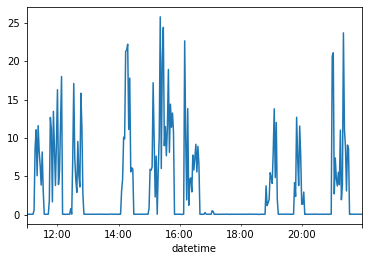

In [103]:
s3[(s3["day"] == 20) & (s3["hour"] > 10) & (s3["hour"] < 22)].resample("2Min").sum()["g"].plot()

<AxesSubplot:xlabel='datetime'>

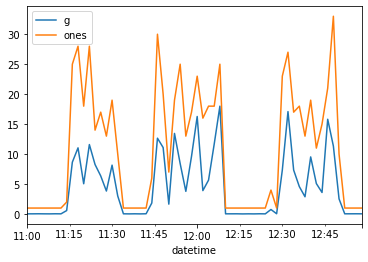

In [3]:
s3[(s3["day"] == 20) & (s3["hour"] > 10) & (s3["hour"] < 13)].resample("2Min").sum()[["g", "ones"]].plot()

<AxesSubplot:xlabel='datetime'>

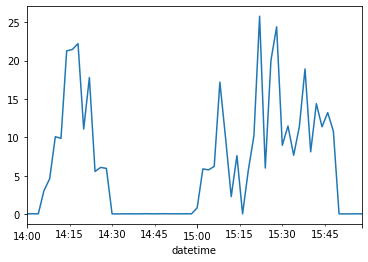

In [105]:
s3[(s3["day"] == 20) & (s3["hour"] > 13) & (s3["hour"] < 16)].resample("2Min").sum()["g"].plot()

In [106]:
s3[(s3["day"] == 20) & (s3["hour"] > 13) & (s3["hour"] < 16)].resample("2Min").sum()["g"]

datetime
2020-11-20 14:00:00+01:00     0.041
2020-11-20 14:02:00+01:00     0.043
2020-11-20 14:04:00+01:00     0.040
2020-11-20 14:06:00+01:00     3.061
2020-11-20 14:08:00+01:00     4.605
2020-11-20 14:10:00+01:00    10.084
2020-11-20 14:12:00+01:00     9.873
2020-11-20 14:14:00+01:00    21.263
2020-11-20 14:16:00+01:00    21.455
2020-11-20 14:18:00+01:00    22.214
2020-11-20 14:20:00+01:00    11.088
2020-11-20 14:22:00+01:00    17.797
2020-11-20 14:24:00+01:00     5.561
2020-11-20 14:26:00+01:00     6.086
2020-11-20 14:28:00+01:00     5.955
2020-11-20 14:30:00+01:00     0.033
2020-11-20 14:32:00+01:00     0.033
2020-11-20 14:34:00+01:00     0.035
2020-11-20 14:36:00+01:00     0.041
2020-11-20 14:38:00+01:00     0.031
2020-11-20 14:40:00+01:00     0.040
2020-11-20 14:42:00+01:00     0.052
2020-11-20 14:44:00+01:00     0.033
2020-11-20 14:46:00+01:00     0.038
2020-11-20 14:48:00+01:00     0.056
2020-11-20 14:50:00+01:00     0.045
2020-11-20 14:52:00+01:00     0.040
2020-11-20 14:54:00

<AxesSubplot:xlabel='datetime'>

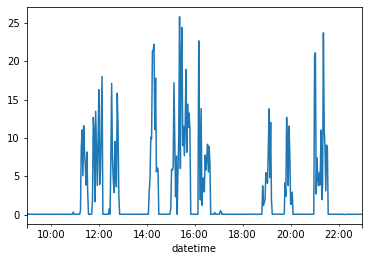

In [107]:
s3[(s3["day"] == 20) & (s3["hour"] > 8) & (s3["hour"] < 23)].resample("2Min").sum()["g"].plot()

In [1]:
s3[(s3["day"] == 20) & (s3["hour"] > 9) & (s3["hour"] < 12)].resample("2Min").sum()["g"].plot()

NameError: name 's3' is not defined

<AxesSubplot:xlabel='datetime'>

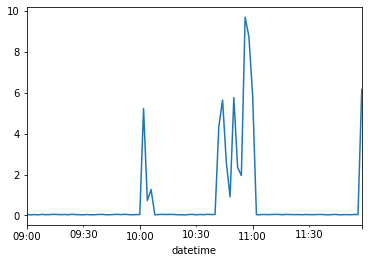

In [120]:
s3[(s3["day"] == 23) & (s3["hour"] > 8) & (s3["hour"] < 12)].resample("2Min").sum()["g"].plot()

In [131]:
s3[(s3["day"] == 15) & (s3["hour"] > 14) & (s3["hour"] < 16)].resample("2Min").sum()["g"]

datetime
2020-11-15 15:00:00+01:00    0.038
2020-11-15 15:02:00+01:00    0.035
2020-11-15 15:04:00+01:00    0.041
2020-11-15 15:06:00+01:00    0.022
2020-11-15 15:08:00+01:00    0.043
2020-11-15 15:10:00+01:00    0.032
2020-11-15 15:12:00+01:00    0.000
2020-11-15 15:14:00+01:00    0.042
2020-11-15 15:16:00+01:00    0.025
2020-11-15 15:18:00+01:00    0.035
2020-11-15 15:20:00+01:00    0.033
2020-11-15 15:22:00+01:00    1.003
2020-11-15 15:24:00+01:00    0.026
2020-11-15 15:26:00+01:00    0.035
2020-11-15 15:28:00+01:00    0.050
2020-11-15 15:30:00+01:00    0.043
2020-11-15 15:32:00+01:00    0.035
2020-11-15 15:34:00+01:00    0.058
2020-11-15 15:36:00+01:00    0.038
2020-11-15 15:38:00+01:00    0.025
2020-11-15 15:40:00+01:00    0.033
2020-11-15 15:42:00+01:00    0.045
2020-11-15 15:44:00+01:00    0.030
2020-11-15 15:46:00+01:00    0.037
2020-11-15 15:48:00+01:00    0.036
2020-11-15 15:50:00+01:00    0.040
2020-11-15 15:52:00+01:00    0.042
2020-11-15 15:54:00+01:00    0.043
2020-11-15 

<AxesSubplot:xlabel='datetime'>

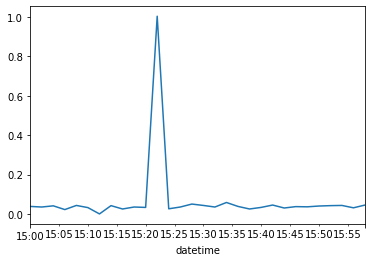

In [132]:
s3[(s3["day"] == 15) & (s3["hour"] > 14) & (s3["hour"] < 16)].resample("2Min").sum()["g"].plot()

In [134]:
s3[(s3["day"] == 15) & (s3["hour"] > 14) & (s3["hour"] < 16)]

,g,year,month,day,week,weekday,Weekday,hour,minutes,ones
datetime,,,,,,,,,,
2020-11-15 15:01:37.309000+01:00,0.038,2020,11,15,46,6,Sunday,15,1,1
2020-11-15 15:03:37.418000+01:00,0.035,2020,11,15,46,6,Sunday,15,3,1
2020-11-15 15:05:37.525000+01:00,0.041,2020,11,15,46,6,Sunday,15,5,1
2020-11-15 15:07:37.618000+01:00,0.022,2020,11,15,46,6,Sunday,15,7,1
2020-11-15 15:09:37.723000+01:00,0.043,2020,11,15,46,6,Sunday,15,9,1
2020-11-15 15:11:37.826000+01:00,0.032,2020,11,15,46,6,Sunday,15,11,1
2020-11-15 15:15:38.089000+01:00,0.042,2020,11,15,46,6,Sunday,15,15,1
2020-11-15 15:17:38.244000+01:00,0.025,2020,11,15,46,6,Sunday,15,17,1
2020-11-15 15:19:38.356000+01:00,0.035,2020,11,15,46,6,Sunday,15,19,1


<AxesSubplot:xlabel='datetime'>

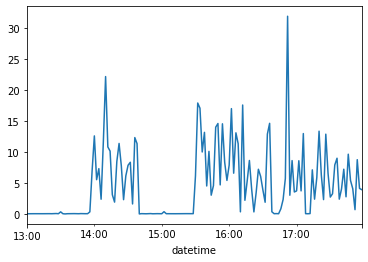

In [141]:
s3[(s3["day"] == 16) & (s3["hour"] > 12) & (s3["hour"] < 18)].resample("2Min").sum()["g"].plot()